Based in insights generated when we analyzed the data, we will try to create a category prediction machine.

So, let's import the dataset with NaN values handled.

In [1]:
import pandas as pd

In [46]:
data = pd.read_csv(r'BankCustomers.csv')
data.head()

,Category,Age,Sex,Dependants,Education,Civil Status,Annual Salary Range,Card Category,Months as a Client,Contracted Products,Inactivity 12m,Contacts 12m,Limit,Consumed Limit,Limit Available,Changes Transactions_Q4_Q1,Valor Transactions 12m,Qty of Transactions 12m,Change Qty of Transactions_Q4_Q1,Card usage Fee
0,Customers,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,Customers,49,F,5,Higher Education,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,Customers,51,M,3,Higher Education,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,Customers,40,F,4,High School,Not informed,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,Customers,40,M,3,No formal education,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


# DATA PRE PROCESSING
First, let's remove columns with high correlation.

In [3]:
df = data.copy()

In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [6]:
X, y = df.drop('Category', axis=1), df.Category

In [7]:
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(X)
X = pd.DataFrame(x_scaler, columns=X.columns)

<AxesSubplot:>

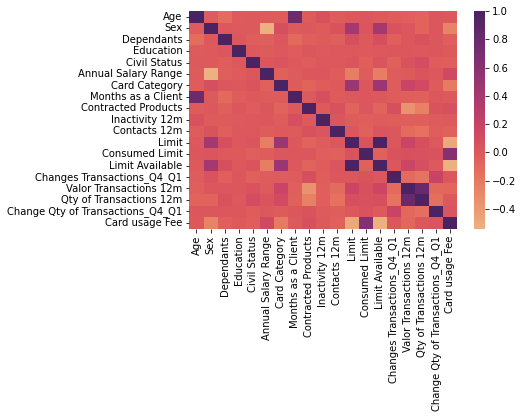

In [8]:
sns.heatmap(data=X.corr(), cmap='flare')

As we can see there is a high level of correlation between **Limit** <-> **Limit Available** and **Transactions Value** <-> **Qty of Transactions**. So, I will delete one of the columns so as  not to bias the model.

<AxesSubplot:>

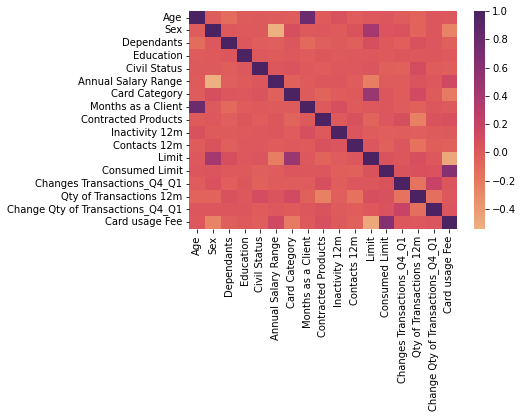

In [9]:
X.drop(['Limit Available', 'Valor Transactions 12m'], inplace=True, axis=1)
sns.heatmap(data=X.corr(), cmap='flare')

# TRAIN TEST MODEL
Let's split **X** and **y** between train and test

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)

In [29]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Now, let's see the accuracy of each model to choose the best one to this problem.

In [37]:
print(f"Decision Tree accuracy: {np.round(dt_model.score(X_test, y_test)*100, 2)}% \nRandom Forest accuracy: {np.round(rf_model.score(X_test, y_test)*100, 2)}%")

Decision Tree accuracy: 88.94% 
Random Forest accuracy: 93.29%


With a best accuracy of 5% we chooses the Random Forest Algorithm.

# INSIGHTS

Let's compare the importance of the each feature of this dataset.

In [33]:
import matplotlib.pyplot as plt

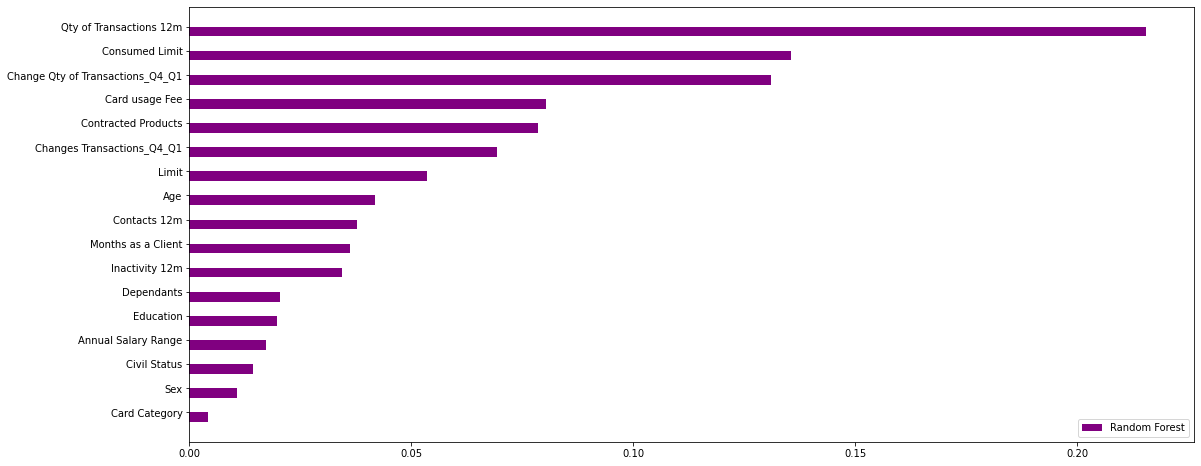

In [45]:
feature_importance=pd.Series(rf_model.feature_importances_,
                             index=X.columns)
feature_importance.sort_values(ascending=True, inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
ax.barh(index,feature_importance,0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.2,yticklabels=feature_importance.index)

ax.legend()
plt.show()

- Different from what we imagine when we analyze only through the graphs. Card category does not have a significant influence on the customer's decision to cancel the card.
- Customers who don't use the card tend to calcel their card, as we can see on **Qty of Transactoin 12m** and on **Change Qty of Transactions_Q4_Q11**.
- How much **Consumed Limit** and **Card Usage Fee**, they reinforce the 2nd insight.